# Data Transformation
In this notebook we will build a regression model to to predict price.

## Importing libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## Loading the data

In [72]:
df = pd.read_csv('data/cleaned.csv')


## Data transformation

In [73]:
df['log_price'] = df['price'].apply(np.log10)
df['ft_living'] = df['sqft_living'].apply(np.sqrt)
df['ft_living15'] = df['sqft_living15'].apply(np.sqrt)
df['log_sqft_lot'] = df['sqft_lot'].apply(np.log10)
Z = pd.get_dummies(df['zipcode'], prefix='zip',drop_first=False)

## Selecting variables for regression

In [147]:
input_variables = ['ft_living15', 'log_sqft_lot', 'bathrooms', 'grade']
output_variable = 'log_price'
X = df[input_variables]
y = df[output_variable]

## Making test-train split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


## Visualizing selected variables

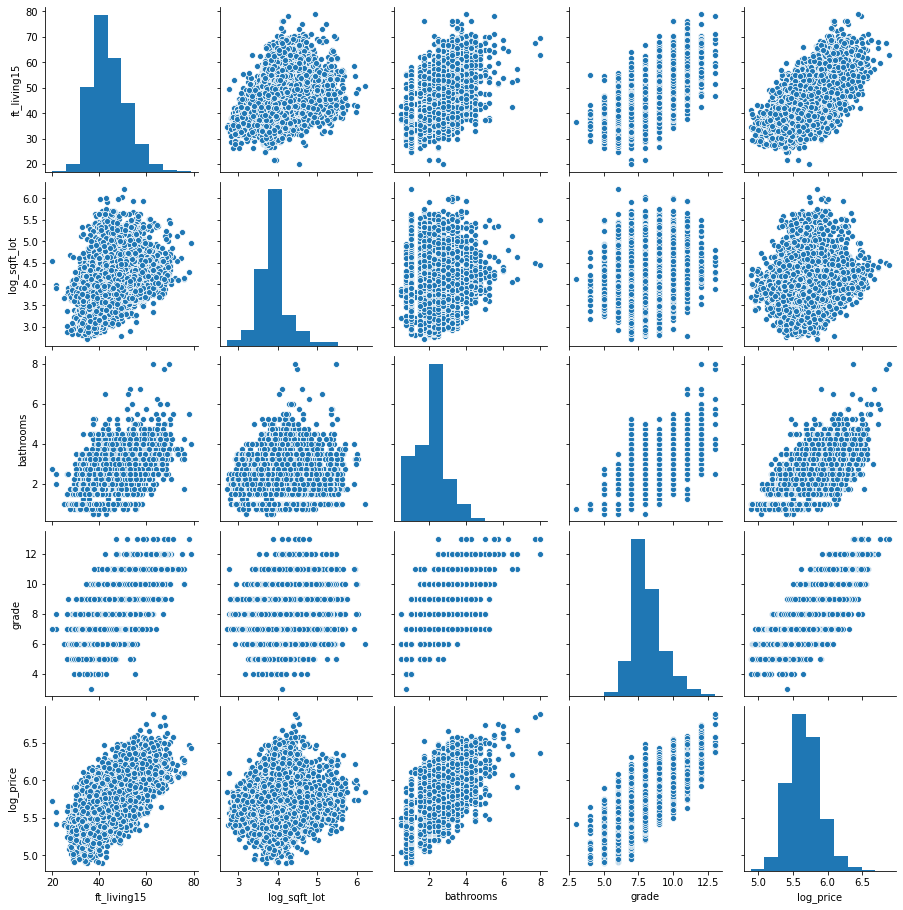

In [149]:
sns.pairplot(pd.concat([X_train,y_train], axis=1))

## Building a model

In [150]:
X1_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X1_train, hasconst=True).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     4957.
Date:                Wed, 07 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:02:09   Log-Likelihood:                 7542.9
No. Observations:               17277   AIC:                        -1.508e+04
Df Residuals:                   17272   BIC:                        -1.504e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6717      0.013    347.655      0.000       4.645       4.698
ft_living15      0.0077      0.000     30.886      0.000       0.007       0.008
log_sqft_lot    -0.0293      0.003     -8.849      0.000      -0.036      -0.023
bathrooms        0.0310      0.002     14.550      0.000       0.027       0.035
grade            0.0921      0.002     57.343      0.000       0.089       0.095
==============================================================================
Omnibus:                       68.313   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.519
Skew:                           0.140   Prob(JB):                     2.18e-15
Kurtosis:                       2.877   Cond. No.                         523.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model validation

In [151]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [152]:
)print(linreg.intercept_, linreg.coef_ )

4.671651083905643 [ 0.00771219 -0.02927397  0.03098347  0.09212333]


In [153]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(10**y_train, 10**y_hat_train)
test_mse = mean_squared_error(10**y_test, 10**y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 252817.24496022367
Test Root Mean Squarred Error: 256789.0197071597


In [154]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 0.15637047039223664
Test Root Mean Squarred Error: 0.15662539672700415


Text(0, 0.5, 'Price')

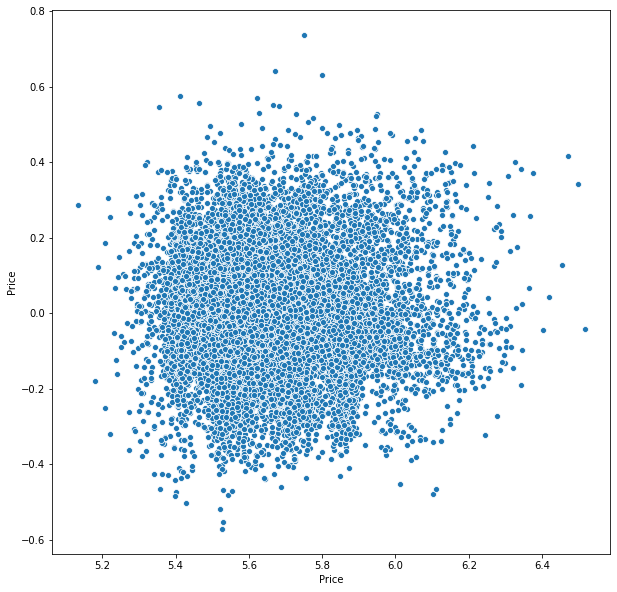

In [155]:
plt.figure(figsize=(10,10))
sns.scatterplot(y_hat_train, y_train - y_hat_train)
plt.xlabel('Price')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

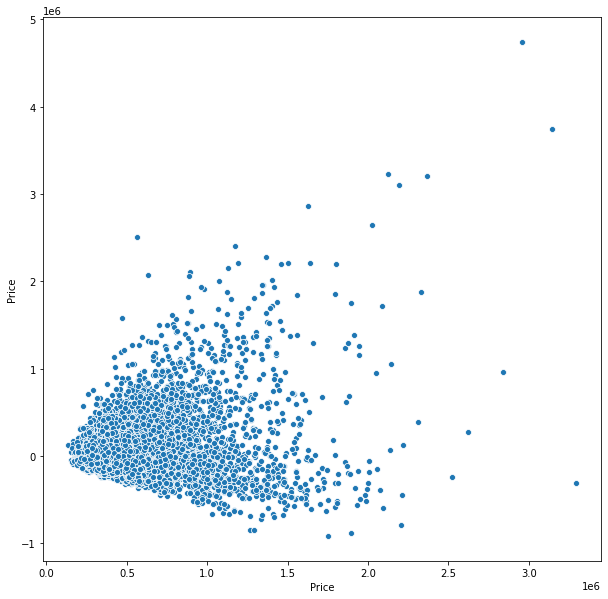

In [158]:
plt.figure(figsize=(10,10))
sns.scatterplot(10**y_hat_train, 10**y_train - 10**y_hat_train)
plt.xlabel('Price')
plt.ylabel('Price')

Text(0, 0.5, 'Percent Error')

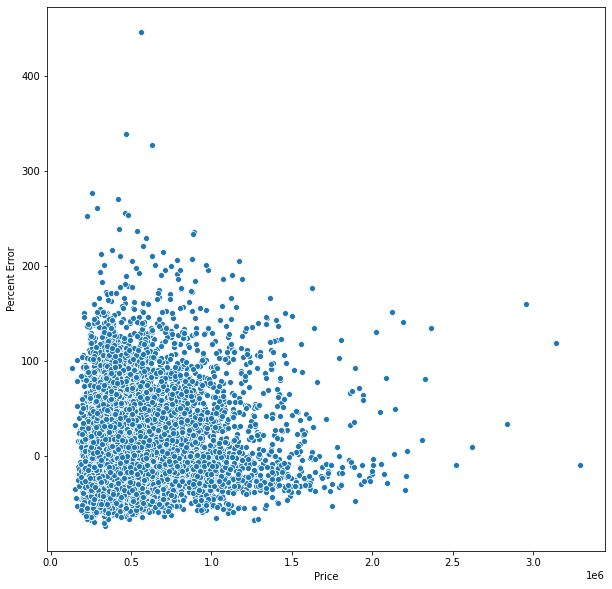

In [157]:
plt.figure(figsize=(10,10))
sns.scatterplot(10**y_hat_train, 100*(10**y_train - 10**y_hat_train)/10**y_hat_train )
#sns.lineplot([10**y_train.min(), 10**y_train.max()], [10**y_train.min(), 10**y_train.max()], color='red')
plt.xlabel('Price')
plt.ylabel('Percent Error')